<a href="https://colab.research.google.com/github/anwishn/ESAA_OB_23-1/blob/main/OB_%EB%B3%B5%EC%8A%B5_%EC%8A%A4%ED%84%B0%EB%94%94_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

비지도 학습 : 알고리즘이 레이블 없는 데이터 바로 사용

* 군집/이상치 탐지/밀도 추정


# 1. 군집


## k-평균

: 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플 할당

* 사이킷런은 이 중에 최선의 솔루션 반환 -> 최선의 솔루션 어떻게 알까?

성능 지표 => 이너셔 : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 -> inertia_ 인스턴스 변수로 모델의 이너셔 확인 가능

* 최적의 클러스터 개수 찾기
  + 이너셔는 k가 증가함에 따라 점점 작아져 -> k를 선택할 때 좋은 성능 지표가 아니다

  + 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 돼 -> 이너셔는 더 작아질 것
그래프로 그렸을 때 그래프가 꺾이는 지점 = 엘보 -> 정답 모른다면 좋은 선택?


* 더 정확한 방법 => 실루엣 점수 : 모든 샘플에 대한 실루엣 계수의 평균
  + 실루엣 계수는 -1에서 +1까지 바뀔 수 있다
    - +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다
    - 0에 가까우면 클러스터 경계에 위치한다
    - -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다
  + 사이킷런의 silhouette_score() 함수 사용 -> 데이터셋에 있는 모든 샘플과 할당된 레이블 전달

## DBSCAN

: 밀집된 연속적 지역을 클러스터로 정의

* 작동 방식
  + 알고리즘이 각 샘플에서 작은 거리인 입실론 내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 샘플의 엡실론-이웃
  + 엡실론-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플로 간주(밀집된 지역에 있는 샘플)
  + 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속해. 이웃에는 다른 핵심 샘플이 포함될 수 있다. -> 계속해서 하나의 클러스터 형성
  + 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단

# 예제 - iris 데이터셋

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# iris 예제 데이터 로드
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'width')

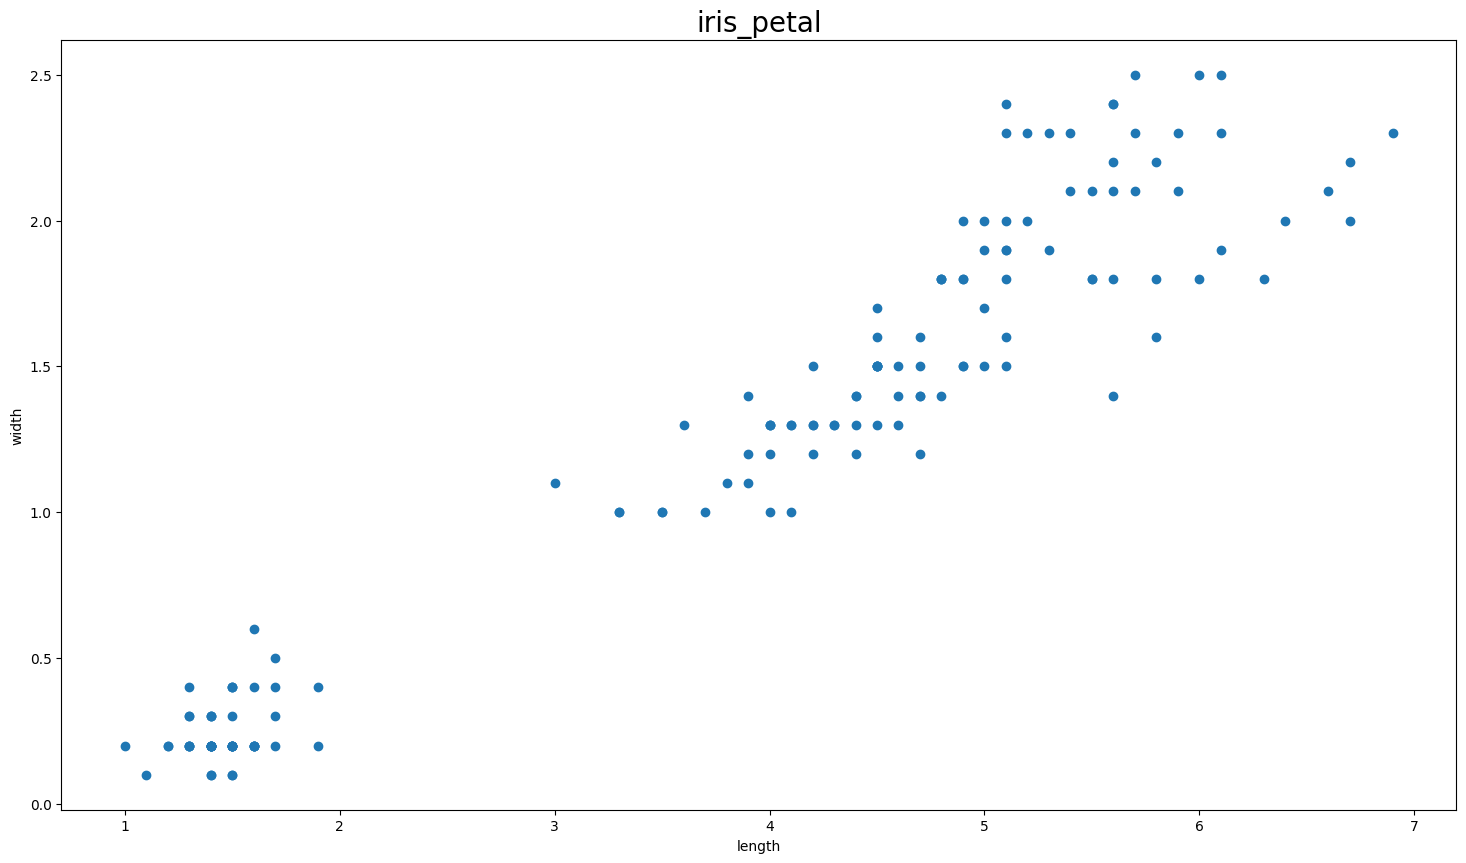

In [2]:
# iris(petal) 데이터 분포 시각화
plt.figure(figsize=(18,10))
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title("iris_petal", fontsize=20)
plt.xlabel("length")
plt.ylabel("width")

* KMeans

In [3]:
from sklearn.cluster import KMeans

k=2
X = iris[['petal_length']]
y = iris[['petal_width']]
model = KMeans(n_clusters=k)

iris['cluster'] = model.fit_predict(X, y)
iris

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


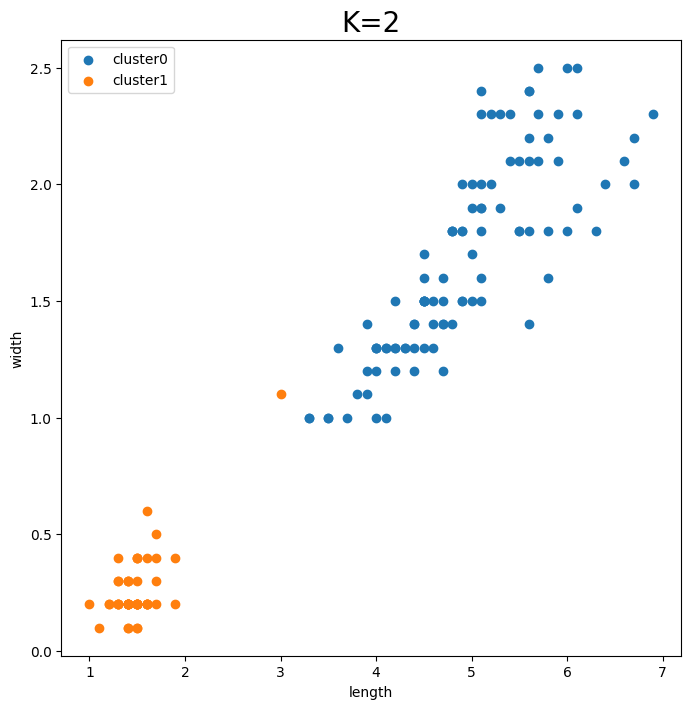

In [4]:
# iris(petal) 군집 결과 시각화
plt.figure(figsize=(8,8))
for i in range(k):
  plt.scatter(
      iris.loc[iris['cluster']==i, 'petal_length'],
      iris.loc[iris['cluster']==i, 'petal_width'],
      label='cluster'+str(i)
  )

plt.title(f"K={k}", fontsize=20)
plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

* silhouette score

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

# iris(petal) 실루엣 계수 값
score_samples = silhouette_samples(iris[['petal_length', 'petal_width']], iris['cluster'])
iris['silhouette_coef'] = score_samples
print(f'silhouette_samples:{score_samples.shape}')

# 실루엣 점수
average_score = silhouette_score(iris[['petal_length', 'petal_width']], iris['cluster'])
print(f'iris silhouette_score:{average_score}')

iris.groupby('cluster')['silhouette_coef'].mean()

silhouette_samples:(150,)
iris silhouette_score:0.7653904101258123


cluster
0    0.690246
1    0.911260
Name: silhouette_coef, dtype: float64

* DBSCAN

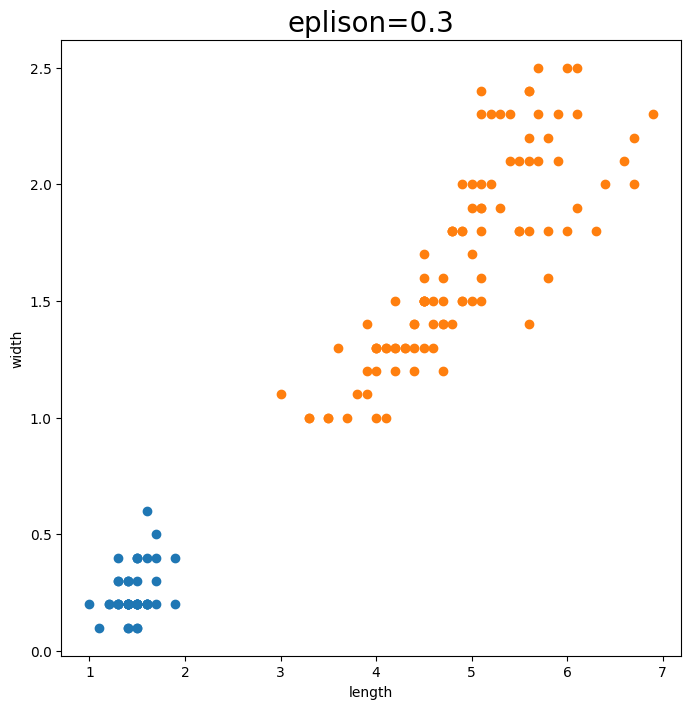

In [6]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=5)
iris['cluster'] = model.fit_predict(iris[['petal_length']], iris[['petal_width']])
n = len(iris['cluster'].unique())

plt.figure(figsize=(8,8))
for i in range(n):
  plt.scatter(
      iris.loc[iris['cluster']==i, 'petal_length'],
      iris.loc[iris['cluster']==i, 'petal_width'],
      label='cluster'+str(i)
  )
plt.title("eplison=0.3", fontsize=20)
plt.xlabel("length")
plt.ylabel("width")
plt.show()